In [1]:
import tensorflow as tf
print(tf.__version__)

#from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import LeakyReLU

from tensorflow.keras.layers.experimental.preprocessing import Normalization

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

import seaborn as sns
sns.set(color_codes=True)

2.1.0


## 1. Reading dataset

In [2]:

bankdata = pd.read_csv('bank.csv')
bankdata


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## 2.1 Dropping columns like CustomerID

In [3]:
bankdata_1 = bankdata.drop(['RowNumber','CustomerId'], axis=1)
bankdata_1

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
bankdata_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [5]:
bankdata_1.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
bankdata_1.isna().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 3 Splitting Features as X_bankdata nd Target variable 'Exited' as y_bankdata

In [7]:
X_bankdata = bankdata_1.iloc[:, :-1]
X_bankdata.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


## 2.2 Dropping 'surname' column

#### Surname is not a criteria to detarmine 'churn'. Hence dropping

In [8]:
X_bankdata.drop(['Surname'], axis=1, inplace=True)
X_bankdata

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [9]:
X_bankdata.shape

(10000, 10)

In [10]:
X_bankdata['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [11]:
X_bankdata['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [12]:
X_bankdata['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
X_bankdata['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

#### One Hot Encoding for 'NumOfProducts' and 'Tenure'

In [14]:
oneHotCols = ['NumOfProducts', 'Tenure','Geography','Gender']
X_bankdata = pd.get_dummies(X_bankdata, columns = oneHotCols)

pd.set_option('display.max_columns', None)

X_bankdata

,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,0.00,1,1,101348.88,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,608,41,83807.86,0,1,112542.58,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,502,42,159660.80,1,0,113931.57,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,699,39,0.00,0,0,93826.63,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,850,43,125510.82,1,1,79084.10,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,0.00,1,0,96270.64,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
9996,516,35,57369.61,1,1,101699.77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
9997,709,36,0.00,0,1,42085.58,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
9998,772,42,75075.31,1,0,92888.52,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


#### Convert to float since during neural network calculations, float is needed

In [15]:
X_bankdata = X_bankdata.astype(float)

In [16]:
X_bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Age                10000 non-null  float64
 2   Balance            10000 non-null  float64
 3   HasCrCard          10000 non-null  float64
 4   IsActiveMember     10000 non-null  float64
 5   EstimatedSalary    10000 non-null  float64
 6   NumOfProducts_1    10000 non-null  float64
 7   NumOfProducts_2    10000 non-null  float64
 8   NumOfProducts_3    10000 non-null  float64
 9   NumOfProducts_4    10000 non-null  float64
 10  Tenure_0           10000 non-null  float64
 11  Tenure_1           10000 non-null  float64
 12  Tenure_2           10000 non-null  float64
 13  Tenure_3           10000 non-null  float64
 14  Tenure_4           10000 non-null  float64
 15  Tenure_5           10000 non-null  float64
 16  Tenure_6           1000

In [17]:
X_bankdata

,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619.0,42.0,0.00,1.0,1.0,101348.88,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,608.0,41.0,83807.86,0.0,1.0,112542.58,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,502.0,42.0,159660.80,1.0,0.0,113931.57,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,699.0,39.0,0.00,0.0,0.0,93826.63,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,850.0,43.0,125510.82,1.0,1.0,79084.10,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,39.0,0.00,1.0,0.0,96270.64,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9996,516.0,35.0,57369.61,1.0,1.0,101699.77,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
9997,709.0,36.0,0.00,0.0,1.0,42085.58,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9998,772.0,42.0,75075.31,1.0,0.0,92888.52,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## 3.1 Target variable

In [18]:
y_bankdata = bankdata_1.iloc[:,-1]
y_bankdata.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [19]:
y_bankdata.shape

(10000,)

## 4 Dividing into Train and Test data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_bankdata, y_bankdata, test_size = 0.3, random_state = 3)

In [21]:
X_train.head()

,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
5795,709.0,39.0,0.00,1.0,0.0,56214.09,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1490,797.0,31.0,0.00,1.0,0.0,117916.63,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3807,470.0,30.0,101140.76,1.0,1.0,50906.65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3042,835.0,29.0,130420.20,0.0,0.0,106276.55,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4064,626.0,39.0,132287.92,1.0,1.0,51467.92,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [22]:
X_train.shape

(7000, 26)

In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 5795 to 5994
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        7000 non-null   float64
 1   Age                7000 non-null   float64
 2   Balance            7000 non-null   float64
 3   HasCrCard          7000 non-null   float64
 4   IsActiveMember     7000 non-null   float64
 5   EstimatedSalary    7000 non-null   float64
 6   NumOfProducts_1    7000 non-null   float64
 7   NumOfProducts_2    7000 non-null   float64
 8   NumOfProducts_3    7000 non-null   float64
 9   NumOfProducts_4    7000 non-null   float64
 10  Tenure_0           7000 non-null   float64
 11  Tenure_1           7000 non-null   float64
 12  Tenure_2           7000 non-null   float64
 13  Tenure_3           7000 non-null   float64
 14  Tenure_4           7000 non-null   float64
 15  Tenure_5           7000 non-null   float64
 16  Tenure_6           70

In [24]:
X_test.head()

,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
5876,704.0,39.0,111525.02,1.0,0.0,199484.96,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6555,641.0,35.0,0.00,1.0,0.0,93148.93,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1448,555.0,46.0,120392.99,1.0,0.0,177719.88,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3351,474.0,34.0,176311.36,1.0,0.0,160213.27,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
231,610.0,40.0,0.00,1.0,0.0,62232.60,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [25]:
X_test.shape

(3000, 26)

In [26]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 5876 to 676
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        3000 non-null   float64
 1   Age                3000 non-null   float64
 2   Balance            3000 non-null   float64
 3   HasCrCard          3000 non-null   float64
 4   IsActiveMember     3000 non-null   float64
 5   EstimatedSalary    3000 non-null   float64
 6   NumOfProducts_1    3000 non-null   float64
 7   NumOfProducts_2    3000 non-null   float64
 8   NumOfProducts_3    3000 non-null   float64
 9   NumOfProducts_4    3000 non-null   float64
 10  Tenure_0           3000 non-null   float64
 11  Tenure_1           3000 non-null   float64
 12  Tenure_2           3000 non-null   float64
 13  Tenure_3           3000 non-null   float64
 14  Tenure_4           3000 non-null   float64
 15  Tenure_5           3000 non-null   float64
 16  Tenure_6           300

In [27]:
y_train.head()

5795    0
1490    0
3807    0
3042    0
4064    1
Name: Exited, dtype: int64

In [28]:
y_train.shape

(7000,)

In [29]:
y_test.head()

5876    0
6555    0
1448    1
3351    0
231     0
Name: Exited, dtype: int64

In [30]:
y_test.shape

(3000,)

In [31]:
# Print predicted 1 and 0's 
unique1, counts1 = np.unique(y_test, return_counts = True)
print('\nThe number of True 1 (Exited) and 0 ( Not Exited) are :\n', dict(zip(unique1, counts1)))


The number of True 1 (Exited) and 0 ( Not Exited) are :
 {0: 2381, 1: 619}


## 5 Normailizing Train and Test data

### 5.1 Normalize the X_train data

In [32]:
# Create the Normalization layer and adapt it to train data. This will get us mean and variance of train data
normalizer_train = Normalization()
normalizer_train.adapt(np.array(X_train[['CreditScore','Age','Balance','EstimatedSalary']]))
print(normalizer_train)
print(normalizer_train.mean.numpy())
print(normalizer_train.variance.numpy())

[6.5076428e+02 3.8854572e+01 7.6307844e+04 9.9459703e+04]
[9.2735283e+03 1.0949428e+02 3.8906243e+09 3.3095567e+09]


In [33]:
train_data_to_normalize = np.array(X_train[['CreditScore','Age','Balance','EstimatedSalary']])

normalizer_train(train_data_to_normalize).numpy() # apply the normalization to the selected same features

array([[ 0.6047375 ,  0.01389797, -1.2233748 , -0.7517218 ],
       [ 1.5185565 , -0.7506316 , -1.2233748 ,  0.3208297 ],
       [-1.8771117 , -0.8461978 ,  0.3981237 , -0.843979  ],
       ...,
       [ 0.28282404,  1.5429571 ,  0.8551371 ,  1.4717058 ],
       [-0.51676756,  0.20503037, -1.2233748 ,  1.0629009 ],
       [-0.73483795, -0.3683668 ,  0.9615021 , -1.29779   ]],
      dtype=float32)

In [34]:
creditScore_norm = normalizer_train(train_data_to_normalize).numpy()[:,0]
creditScore_norm

array([ 0.6047375 ,  1.5185565 , -1.8771117 , ...,  0.28282404,
       -0.51676756, -0.73483795], dtype=float32)

In [35]:
X_train['CreditScore_norm'] = creditScore_norm.tolist()
X_train

C:\Users\cgunn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore_norm
5795,709.0,39.0,0.00,1.0,0.0,56214.09,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.604738
1490,797.0,31.0,0.00,1.0,0.0,117916.63,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.518556
3807,470.0,30.0,101140.76,1.0,1.0,50906.65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.877112
3042,835.0,29.0,130420.20,0.0,0.0,106276.55,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.913160
4064,626.0,39.0,132287.92,1.0,1.0,51467.92,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.257160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400,676.0,30.0,0.00,0.0,0.0,179066.58,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.262055
9160,778.0,24.0,0.00,1.0,1.0,162809.20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.321255
9859,678.0,55.0,129646.91,1.0,1.0,184125.10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.282824
1688,601.0,41.0,0.00,0.0,1.0,160607.06,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.516768


In [36]:
Age_norm = normalizer_train(train_data_to_normalize).numpy()[:,1]
Age_norm

array([ 0.01389797, -0.7506316 , -0.8461978 , ...,  1.5429571 ,
        0.20503037, -0.3683668 ], dtype=float32)

In [37]:
X_train['Age_norm'] = Age_norm.tolist()
X_train

C:\Users\cgunn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore_norm,Age_norm
5795,709.0,39.0,0.00,1.0,0.0,56214.09,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.604738,0.013898
1490,797.0,31.0,0.00,1.0,0.0,117916.63,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.518556,-0.750632
3807,470.0,30.0,101140.76,1.0,1.0,50906.65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.877112,-0.846198
3042,835.0,29.0,130420.20,0.0,0.0,106276.55,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.913160,-0.941764
4064,626.0,39.0,132287.92,1.0,1.0,51467.92,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.257160,0.013898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400,676.0,30.0,0.00,0.0,0.0,179066.58,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.262055,-0.846198
9160,778.0,24.0,0.00,1.0,1.0,162809.20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.321255,-1.419595
9859,678.0,55.0,129646.91,1.0,1.0,184125.10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.282824,1.542957
1688,601.0,41.0,0.00,0.0,1.0,160607.06,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.516768,0.205030


In [38]:
Balance_norm = normalizer_train(train_data_to_normalize).numpy()[:,2]
Balance_norm

array([-1.2233748, -1.2233748,  0.3981237, ...,  0.8551371, -1.2233748,
        0.9615021], dtype=float32)

In [39]:
X_train['Balance_norm'] = Balance_norm.tolist()
X_train

C:\Users\cgunn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore_norm,Age_norm,Balance_norm
5795,709.0,39.0,0.00,1.0,0.0,56214.09,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.604738,0.013898,-1.223375
1490,797.0,31.0,0.00,1.0,0.0,117916.63,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.518556,-0.750632,-1.223375
3807,470.0,30.0,101140.76,1.0,1.0,50906.65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.877112,-0.846198,0.398124
3042,835.0,29.0,130420.20,0.0,0.0,106276.55,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.913160,-0.941764,0.867535
4064,626.0,39.0,132287.92,1.0,1.0,51467.92,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.257160,0.013898,0.897478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400,676.0,30.0,0.00,0.0,0.0,179066.58,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.262055,-0.846198,-1.223375
9160,778.0,24.0,0.00,1.0,1.0,162809.20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.321255,-1.419595,-1.223375
9859,678.0,55.0,129646.91,1.0,1.0,184125.10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.282824,1.542957,0.855137
1688,601.0,41.0,0.00,0.0,1.0,160607.06,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.516768,0.205030,-1.223375


In [40]:
EstimatedSalary_norm = normalizer_train(train_data_to_normalize).numpy()[:,3]
EstimatedSalary_norm

array([-0.7517218,  0.3208297, -0.843979 , ...,  1.4717058,  1.0629009,
       -1.29779  ], dtype=float32)

In [41]:
X_train['EstimatedSalary_norm'] = EstimatedSalary_norm.tolist()
X_train

C:\Users\cgunn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore_norm,Age_norm,Balance_norm,EstimatedSalary_norm
5795,709.0,39.0,0.00,1.0,0.0,56214.09,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.604738,0.013898,-1.223375,-0.751722
1490,797.0,31.0,0.00,1.0,0.0,117916.63,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.518556,-0.750632,-1.223375,0.320830
3807,470.0,30.0,101140.76,1.0,1.0,50906.65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.877112,-0.846198,0.398124,-0.843979
3042,835.0,29.0,130420.20,0.0,0.0,106276.55,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.913160,-0.941764,0.867535,0.118495
4064,626.0,39.0,132287.92,1.0,1.0,51467.92,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.257160,0.013898,0.897478,-0.834223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400,676.0,30.0,0.00,0.0,0.0,179066.58,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.262055,-0.846198,-1.223375,1.383776
9160,778.0,24.0,0.00,1.0,1.0,162809.20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.321255,-1.419595,-1.223375,1.101180
9859,678.0,55.0,129646.91,1.0,1.0,184125.10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.282824,1.542957,0.855137,1.471706
1688,601.0,41.0,0.00,0.0,1.0,160607.06,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.516768,0.205030,-1.223375,1.062901


#### Drop the non normalized feature values since we have normalized features in diff columns

In [42]:
X_train = X_train.drop(['CreditScore','Age','Balance','EstimatedSalary'], axis=1)

In [43]:
X_train

,HasCrCard,IsActiveMember,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore_norm,Age_norm,Balance_norm,EstimatedSalary_norm
5795,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.604738,0.013898,-1.223375,-0.751722
1490,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.518556,-0.750632,-1.223375,0.320830
3807,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.877112,-0.846198,0.398124,-0.843979
3042,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.913160,-0.941764,0.867535,0.118495
4064,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.257160,0.013898,0.897478,-0.834223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.262055,-0.846198,-1.223375,1.383776
9160,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.321255,-1.419595,-1.223375,1.101180
9859,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.282824,1.542957,0.855137,1.471706
1688,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.516768,0.205030,-1.223375,1.062901


### 5.2  Normalize the X_test data

In [44]:
# Create the Normalization layer and adapt it to train data. This will get us mean and variance of train data
normalizer_test = Normalization()
normalizer_test.adapt(np.array(X_test[['CreditScore','Age','Balance','EstimatedSalary']]))
print(normalizer_test)
print(normalizer_test.mean.numpy())
print(normalizer_test.variance.numpy())

[6.4997931e+02 3.9078667e+01 7.6901336e+04 1.0156149e+05]
[9.4977559e+03 1.1108848e+02 3.8984530e+09 3.2983624e+09]


In [45]:
test_data_to_normalize = np.array(X_test[['CreditScore','Age','Balance','EstimatedSalary']])

normalizer_test(test_data_to_normalize).numpy() # apply the normalization to the selected same features

array([[ 0.5543061 , -0.00746374,  0.5545327 ,  1.7050518 ],
       [-0.09213665, -0.3869757 , -1.2316512 , -0.14648026],
       [-0.9745823 ,  0.6566822 ,  0.696562  ,  1.3260764 ],
       ...,
       [ 0.82109195, -0.3869757 ,  1.2583638 , -0.83305013],
       [-1.5799811 , -0.8613657 ,  0.22521938, -1.2843066 ],
       [-0.58466446, -0.10234173,  0.18955089, -0.6014389 ]],
      dtype=float32)

#### Seperate out the normalized credit score from all normalized values

In [46]:
creditScore_norm1 = normalizer_test(test_data_to_normalize).numpy()[:,0]
creditScore_norm1

array([ 0.5543061 , -0.09213665, -0.9745823 , ...,  0.82109195,
       -1.5799811 , -0.58466446], dtype=float32)

#### Add normalized credit score to data frame X_test

In [47]:
X_test['CreditScore_norm'] = creditScore_norm1.tolist()
X_test

C:\Users\cgunn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore_norm
5876,704.0,39.0,111525.02,1.0,0.0,199484.96,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.554306
6555,641.0,35.0,0.00,1.0,0.0,93148.93,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.092137
1448,555.0,46.0,120392.99,1.0,0.0,177719.88,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.974582
3351,474.0,34.0,176311.36,1.0,0.0,160213.27,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.805723
231,610.0,40.0,0.00,1.0,0.0,62232.60,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.410228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,460.0,46.0,127559.97,1.0,1.0,126952.50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.949377
5373,776.0,30.0,0.00,0.0,1.0,63908.86,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.293098
485,730.0,35.0,155470.55,1.0,1.0,53718.28,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.821092
5657,496.0,30.0,90963.49,0.0,1.0,27802.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.579981


#### Seperate out the normalized credit score from all normalized values

In [48]:
Age_norm1 = normalizer_test(test_data_to_normalize).numpy()[:,1]
Age_norm1

array([-0.00746374, -0.3869757 ,  0.6566822 , ..., -0.3869757 ,
       -0.8613657 , -0.10234173], dtype=float32)

#### Add normalized credit score to data frame X_test

In [49]:
X_test['Age_norm'] = Age_norm1.tolist()
X_test

C:\Users\cgunn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore_norm,Age_norm
5876,704.0,39.0,111525.02,1.0,0.0,199484.96,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.554306,-0.007464
6555,641.0,35.0,0.00,1.0,0.0,93148.93,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.092137,-0.386976
1448,555.0,46.0,120392.99,1.0,0.0,177719.88,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.974582,0.656682
3351,474.0,34.0,176311.36,1.0,0.0,160213.27,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.805723,-0.481854
231,610.0,40.0,0.00,1.0,0.0,62232.60,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.410228,0.087414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,460.0,46.0,127559.97,1.0,1.0,126952.50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.949377,0.656682
5373,776.0,30.0,0.00,0.0,1.0,63908.86,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.293098,-0.861366
485,730.0,35.0,155470.55,1.0,1.0,53718.28,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.821092,-0.386976
5657,496.0,30.0,90963.49,0.0,1.0,27802.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.579981,-0.861366


#### Seperate out the normalized credit score from all normalized values

In [50]:
Balance_norm1 = normalizer_test(test_data_to_normalize).numpy()[:,2]
Balance_norm1

array([ 0.5545327 , -1.2316512 ,  0.696562  , ...,  1.2583638 ,
        0.22521938,  0.18955089], dtype=float32)

#### Add normalized credit score to data frame X_test

In [51]:
X_test['Balance_norm'] = Balance_norm1.tolist()
X_test

C:\Users\cgunn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore_norm,Age_norm,Balance_norm
5876,704.0,39.0,111525.02,1.0,0.0,199484.96,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.554306,-0.007464,0.554533
6555,641.0,35.0,0.00,1.0,0.0,93148.93,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.092137,-0.386976,-1.231651
1448,555.0,46.0,120392.99,1.0,0.0,177719.88,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.974582,0.656682,0.696562
3351,474.0,34.0,176311.36,1.0,0.0,160213.27,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.805723,-0.481854,1.592150
231,610.0,40.0,0.00,1.0,0.0,62232.60,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.410228,0.087414,-1.231651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,460.0,46.0,127559.97,1.0,1.0,126952.50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.949377,0.656682,0.811348
5373,776.0,30.0,0.00,0.0,1.0,63908.86,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.293098,-0.861366,-1.231651
485,730.0,35.0,155470.55,1.0,1.0,53718.28,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.821092,-0.386976,1.258364
5657,496.0,30.0,90963.49,0.0,1.0,27802.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.579981,-0.861366,0.225219


#### Seperate out the normalized credit score from all normalized values

In [52]:
EstimatedSalary_norm1 = normalizer_test(test_data_to_normalize).numpy()[:,3]
EstimatedSalary_norm1

array([ 1.7050518 , -0.14648026,  1.3260764 , ..., -0.83305013,
       -1.2843066 , -0.6014389 ], dtype=float32)

#### Add normalized credit score to data frame X_test

In [53]:
X_test['EstimatedSalary_norm'] = EstimatedSalary_norm1.tolist()
X_test

C:\Users\cgunn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore_norm,Age_norm,Balance_norm,EstimatedSalary_norm
5876,704.0,39.0,111525.02,1.0,0.0,199484.96,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.554306,-0.007464,0.554533,1.705052
6555,641.0,35.0,0.00,1.0,0.0,93148.93,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.092137,-0.386976,-1.231651,-0.146480
1448,555.0,46.0,120392.99,1.0,0.0,177719.88,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.974582,0.656682,0.696562,1.326076
3351,474.0,34.0,176311.36,1.0,0.0,160213.27,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.805723,-0.481854,1.592150,1.021250
231,610.0,40.0,0.00,1.0,0.0,62232.60,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.410228,0.087414,-1.231651,-0.684798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,460.0,46.0,127559.97,1.0,1.0,126952.50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.949377,0.656682,0.811348,0.442110
5373,776.0,30.0,0.00,0.0,1.0,63908.86,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.293098,-0.861366,-1.231651,-0.655611
485,730.0,35.0,155470.55,1.0,1.0,53718.28,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.821092,-0.386976,1.258364,-0.833050
5657,496.0,30.0,90963.49,0.0,1.0,27802.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.579981,-0.861366,0.225219,-1.284307


#### Drop the non normalized feature values since we have normalized features in diff columns

In [54]:
X_test = X_test.drop(['CreditScore','Age','Balance','EstimatedSalary'], axis=1)

In [55]:
X_test

,HasCrCard,IsActiveMember,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore_norm,Age_norm,Balance_norm,EstimatedSalary_norm
5876,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.554306,-0.007464,0.554533,1.705052
6555,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.092137,-0.386976,-1.231651,-0.146480
1448,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.974582,0.656682,0.696562,1.326076
3351,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.805723,-0.481854,1.592150,1.021250
231,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.410228,0.087414,-1.231651,-0.684798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.949377,0.656682,0.811348,0.442110
5373,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.293098,-0.861366,-1.231651,-0.655611
485,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.821092,-0.386976,1.258364,-0.833050
5657,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.579981,-0.861366,0.225219,-1.284307


## 6 Initializing & Building multiple models and implementaing the models

### 6.1 Case 1- Compiling model . Will use the gradient descent optimization , with 'binary_crossentropy' loss function

### Creating Model using Keras

In [56]:
bankdata_model = Sequential()

### Adding layers to the model.

In [57]:
bankdata_model.add(Dense(64, input_shape = (26,), activation = 'elu'))
bankdata_model.add(Dense(32, activation = 'relu'))
bankdata_model.add(Dense(1, activation = 'sigmoid'))  # sigmoid since we are classifying the data , to find out 'churn' possibility

In [58]:
gd_optimizer = optimizers.Adam(lr = 0.001)

In [59]:
bankdata_model.compile(optimizer = gd_optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])

#### Model summary

In [60]:
bankdata_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1728      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________________


### Training model with forward pass and backpropogation 

In [61]:
bankdata_model.fit(X_train, y_train, batch_size = 500, epochs = 40, verbose = 1)

Train on 7000 samples
Epoch 1/40
7000/7000 [==============================] - 0s 60us/sample - loss: 0.6388 - accuracy: 0.6291
Epoch 2/40
7000/7000 [==============================] - 0s 7us/sample - loss: 0.4688 - accuracy: 0.7979
Epoch 3/40
7000/7000 [==============================] - 0s 7us/sample - loss: 0.4245 - accuracy: 0.8046
Epoch 4/40
7000/7000 [==============================] - 0s 7us/sample - loss: 0.4010 - accuracy: 0.8154
Epoch 5/40
7000/7000 [==============================] - 0s 4us/sample - loss: 0.3868 - accuracy: 0.8250
Epoch 6/40
7000/7000 [==============================] - 0s 6us/sample - loss: 0.3766 - accuracy: 0.8339
Epoch 7/40
7000/7000 [==============================] - 0s 5us/sample - loss: 0.3702 - accuracy: 0.8383
Epoch 8/40
7000/7000 [==============================] - 0s 5us/sample - loss: 0.3653 - accuracy: 0.8414
Epoch 9/40
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3617 - accuracy: 0.8436
Epoch 10/40
7000/7000 [==================

In [62]:
bankdata_model.history.history.keys()

dict_keys(['loss', 'accuracy'])

In [63]:
print('Train data loss is :', bankdata_model.history.history['loss'])

Train data loss is : [0.6387757446084704, 0.4688453653029033, 0.42453912113394054, 0.4010474703141621, 0.3867990289415632, 0.37662059707301004, 0.37017357988016947, 0.36534894577094484, 0.3616945892572403, 0.35834499980722156, 0.3556670035634722, 0.35319024537290844, 0.35109105493341175, 0.34911076511655537, 0.3475488956485476, 0.3456477288688932, 0.3441279019628252, 0.3426783574478967, 0.3416727419410433, 0.33999654012066977, 0.33951832354068756, 0.3378882386854717, 0.3369566329887935, 0.33553375942366465, 0.33455100655555725, 0.3339563650744302, 0.33287981152534485, 0.33227800684315817, 0.3310479521751404, 0.3306135811976024, 0.330000211085592, 0.3290136882237026, 0.32846524459975107, 0.32833301595279146, 0.32717833135809216, 0.32628371885844637, 0.3260332303387778, 0.3257502040692738, 0.3251246575798307, 0.3248718295778547]


In [64]:
print('Train data loss is :', bankdata_model.history.history['loss'][-1])

Train data loss is : 0.3248718295778547


In [65]:
print('Train data accuracy is :', bankdata_model.history.history['accuracy'][-1])

Train data accuracy is : 0.8657143


### Model Evaluation 

In [66]:
eva_results = bankdata_model.evaluate(X_test, y_test.values)

3000/3000 [==============================] - 0s 57us/sample - loss: 0.3565 - accuracy: 0.8590


In [67]:
print(bankdata_model.metrics_names)
print(eva_results)

['loss', 'accuracy']
[0.3565266535282135, 0.859]


In [68]:
print('Test data loss is :', eva_results[0])

Test data loss is : 0.3565266535282135


In [69]:
print('Test data accuracy is :', eva_results[1])

Test data accuracy is : 0.859


### 7.1 Prediting using classes and probability , with threshold of 0.5

#### Option 1- using predict_classes ( without using threshold )

In [70]:
Y_pred_class = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1)
print(Y_pred_class)

3000/3000 [==============================] - 0s 16us/sample
[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


#### Option 2 - using predict to get predicted values of 'Exited' , based on which threshold of 0.5 can be applied

In [71]:
Y_pred_value = bankdata_model.predict(X_test, batch_size=200, verbose=1)
print(Y_pred_value)

3000/3000 [==============================] - 0s 5us/sample
[[0.15578951]
 [0.01063805]
 [0.7440114 ]
 ...
 [0.13904649]
 [0.04842578]
 [0.21528824]]


In [72]:
Y_pred_value_class = (Y_pred_value > 0.5).astype(int)
print(Y_pred_value_class)

[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


## 8.1 Printing Accuracy scores and confusion matrix

### Confusion metrics - when using predict_classes method 

In [73]:
# Y_pred_class = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Adam optimizer Case1:'+ str(bankdata_model.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_class)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_class)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_class)))
confusion_matrix(y_test.values, Y_pred_class)

3000/3000 [==============================] - 0s 38us/sample - loss: 0.3565 - accuracy: 0.8590
Accuracy of Model with Adam optimizer Case1:0.859
Recall_score: 0.47495961227786754
Precision_score: 0.75
F-score: 0.5816023738872402


array([[2283,   98],
       [ 325,  294]], dtype=int64)

### Confusion metrics - when using predict method that gives values , and where threshold of 0.5 has been applied

In [74]:
# Y_pred_value_class = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Adam optimizer Case 1 :'+ str(bankdata_model.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_value_class)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_value_class)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_value_class)))
confusion_matrix(y_test.values, Y_pred_value_class)

3000/3000 [==============================] - 0s 33us/sample - loss: 0.3565 - accuracy: 0.8590
Accuracy of Model with Adam optimizer Case 1 :0.859
Recall_score: 0.47495961227786754
Precision_score: 0.75
F-score: 0.5816023738872402


array([[2283,   98],
       [ 325,  294]], dtype=int64)

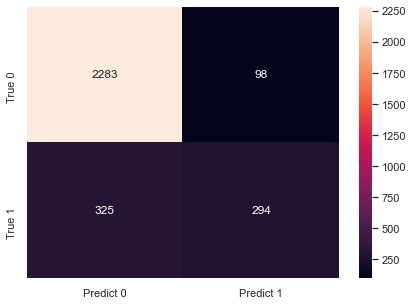

In [75]:
cm_adam = confusion_matrix(y_test.values, Y_pred_value_class)
df_cm_adam = pd.DataFrame(cm_adam, index = [i for i in ["True 0", "True 1"]],
                     columns = [i for i in ["Predict 0", "Predict 1"]] )
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_adam, annot=True, fmt = 'd');

#### creating a results df to hold results of diff runs

In [76]:
results_df = pd.DataFrame([[1,'Adam',3,64,'elu',32,'relu',1,'sigmoid', 0, 'No layer',0,'No layer',0,0, 0,0,0,0,0]], 
                          columns = ['Case X','Model details','Num of layers','Layer 1 nodes','Layer1 Act F','Layer 2 nodes','Layer2 Act F',
                            'Layer 3 nodes','Layer3 Act F', 'Layer 4 nodes', 'Layer4 Act F','Layer 5 nodes', 'Layer5 Act F',
                                     'Train data-loss','Train data-Accuracy', 'Test data-Loss',
                            'Test data-Accuracy','Recall score','Precision score','F score'])

row_index = 0

In [77]:
row_index = row_index + 1

results_df_data = [ 1,'Adam',3,64,'elu',32,'relu',1,'sigmoid', 0, 'No layer', 0,'No layer',
                   bankdata_model.history.history['loss'][-1],
                            bankdata_model.history.history['accuracy'][-1], eva_results[0],eva_results[1], 
                            recall_score(y_test.values,Y_pred_value_class), precision_score(y_test.values, Y_pred_value_class), 
                            f1_score(y_test.values,Y_pred_value_class)]
results_df.loc[row_index] = results_df_data
results_df = results_df.drop([0])

In [78]:
results_df

,Case X,Model details,Num of layers,Layer 1 nodes,Layer1 Act F,Layer 2 nodes,Layer2 Act F,Layer 3 nodes,Layer3 Act F,Layer 4 nodes,Layer4 Act F,Layer 5 nodes,Layer5 Act F,Train data-loss,Train data-Accuracy,Test data-Loss,Test data-Accuracy,Recall score,Precision score,F score
1,1,Adam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.324872,0.865714,0.356527,0.859,0.47496,0.75,0.581602


### 6.2  Case 2 using Nadam optimizer

##### Creating Model using Keras

In [79]:
bankdata_model_nadam = Sequential()

### Adding layers to the model.

In [80]:
bankdata_model_nadam.add(Dense(64, input_shape = (26,), activation = 'elu'))
bankdata_model_nadam.add(Dense(32, activation = 'relu'))
bankdata_model_nadam.add(Dense(1, activation = 'sigmoid'))  # sigmoid since we are classifying the data , to find out 'churn' possibility

In [81]:
gd_optimizer_nadam = optimizers.Nadam(lr = 0.001) ## use beta_1 , beta_2 , epsilon as deafults

In [82]:
bankdata_model_nadam.compile(optimizer = gd_optimizer_nadam, loss = 'binary_crossentropy', metrics=['accuracy'])

#### Model summary

In [83]:
bankdata_model_nadam.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                1728      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________________


### Training model with forward pass and backpropogation 

In [84]:
bankdata_model_nadam.fit(X_train, y_train, batch_size = 500, epochs = 40, verbose = 1)

Train on 7000 samples
Epoch 1/40
7000/7000 [==============================] - 1s 84us/sample - loss: 0.6258 - accuracy: 0.6781
Epoch 2/40
7000/7000 [==============================] - 0s 5us/sample - loss: 0.4805 - accuracy: 0.8047
Epoch 3/40
7000/7000 [==============================] - 0s 6us/sample - loss: 0.4250 - accuracy: 0.8087
Epoch 4/40
7000/7000 [==============================] - 0s 6us/sample - loss: 0.4006 - accuracy: 0.8173
Epoch 5/40
7000/7000 [==============================] - 0s 6us/sample - loss: 0.3867 - accuracy: 0.8276
Epoch 6/40
7000/7000 [==============================] - 0s 6us/sample - loss: 0.3773 - accuracy: 0.8329
Epoch 7/40
7000/7000 [==============================] - 0s 5us/sample - loss: 0.3705 - accuracy: 0.8376
Epoch 8/40
7000/7000 [==============================] - 0s 5us/sample - loss: 0.3659 - accuracy: 0.8419
Epoch 9/40
7000/7000 [==============================] - 0s 12us/sample - loss: 0.3618 - accuracy: 0.8453
Epoch 10/40
7000/7000 [=================

### Model Evaluation 

In [85]:
eva_results_nadam = bankdata_model_nadam.evaluate(X_test, y_test.values)

3000/3000 [==============================] - 0s 72us/sample - loss: 0.3516 - accuracy: 0.8633


In [86]:
print(bankdata_model_nadam.metrics_names)
print(eva_results_nadam)

['loss', 'accuracy']
[0.35158412345250445, 0.86333334]


### 7.2 Prediting using classes and probability , with threshold of 0.5

#### Option 1- using predict_classes ( without using threshold )

In [87]:
Y_pred_class_nadam = bankdata_model_nadam.predict_classes(X_test, batch_size=200, verbose=1)
print(Y_pred_class_nadam)

3000/3000 [==============================] - 0s 18us/sample
[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


#### Option 2 - using predict to get predicted values of 'Exited' , based on which threshold of 0.5 can be applied

In [88]:
Y_pred_value_nadam = bankdata_model_nadam.predict(X_test, batch_size=200, verbose=1)
print(Y_pred_value_nadam)

3000/3000 [==============================] - 0s 6us/sample
[[0.15257612]
 [0.00975756]
 [0.7073016 ]
 ...
 [0.1205968 ]
 [0.04891653]
 [0.15532085]]


In [89]:
Y_pred_value_class_nadam = (Y_pred_value_nadam > 0.5).astype(int)
print(Y_pred_value_class_nadam)

[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


## 8.2 Printing Accuracy scores and confusion matrix

### Confusion metrics - when using predict_classes method 

In [90]:
# Y_pred_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Nadam optimizer :'+ str(bankdata_model_nadam.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_class_nadam)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_class_nadam)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_class_nadam)))
confusion_matrix(y_test.values, Y_pred_class_nadam)

3000/3000 [==============================] - 0s 39us/sample - loss: 0.3516 - accuracy: 0.8633
Accuracy of Model with Nadam optimizer :0.86333334
Recall_score: 0.44426494345718903
Precision_score: 0.8064516129032258
F-score: 0.5729166666666666


array([[2315,   66],
       [ 344,  275]], dtype=int64)

### Confusion metrics - when using predict method that gives values , and where threshold of 0.5 has been applied

In [91]:
# Y_pred_value_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Nadam optimizer :'+ str(bankdata_model_nadam.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_value_class_nadam)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_value_class_nadam)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_value_class_nadam)))
confusion_matrix(y_test.values, Y_pred_value_class_nadam)

3000/3000 [==============================] - 0s 37us/sample - loss: 0.3516 - accuracy: 0.8633
Accuracy of Model with Nadam optimizer :0.86333334
Recall_score: 0.44426494345718903
Precision_score: 0.8064516129032258
F-score: 0.5729166666666666


array([[2315,   66],
       [ 344,  275]], dtype=int64)

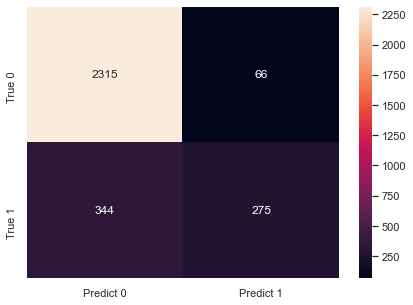

In [92]:
cm_nadam = confusion_matrix(y_test.values, Y_pred_value_class_nadam)
df_cm_nadam = pd.DataFrame(cm_nadam, index = [i for i in ["True 0", "True 1"]],
                     columns = [i for i in ["Predict 0", "Predict 1"]] )
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_nadam, annot=True, fmt = 'd');

In [93]:
row_index = row_index + 1

results_df_data = [ 2,'Nadam',3,64,'elu',32,'relu',1,'sigmoid', 0, 'No layer', 0,'No layer',
                   bankdata_model_nadam.history.history['loss'][-1],
                            bankdata_model_nadam.history.history['accuracy'][-1], eva_results_nadam[0],eva_results_nadam[1], 
                            recall_score(y_test.values,Y_pred_value_class_nadam), precision_score(y_test.values, 
                            Y_pred_value_class_nadam), f1_score(y_test.values,Y_pred_value_class_nadam)]
results_df.loc[row_index] = results_df_data
#results_df = results_df.drop[0]

In [94]:
results_df

,Case X,Model details,Num of layers,Layer 1 nodes,Layer1 Act F,Layer 2 nodes,Layer2 Act F,Layer 3 nodes,Layer3 Act F,Layer 4 nodes,Layer4 Act F,Layer 5 nodes,Layer5 Act F,Train data-loss,Train data-Accuracy,Test data-Loss,Test data-Accuracy,Recall score,Precision score,F score
1,1,Adam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.324872,0.865714,0.356527,0.859000,0.474960,0.750000,0.581602
2,2,Nadam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.326212,0.865429,0.351584,0.863333,0.444265,0.806452,0.572917


### 6.3  Case 3 using Adam optimizer  with LeakyRelu activation function , since it gives a small graddient when z<0

##### Creating Model using Keras

In [95]:
bankdata_model_adam2 = Sequential()

### Adding layers to the model. Here we add LeakyReLU as a layer since advanced activation is to be added as layer and not called as a function

In [96]:
bankdata_model_adam2.add(Dense(64, input_shape = (26,), activation = 'elu'))
bankdata_model_adam2.add(Dense(32, LeakyReLU(alpha=0.1)))
bankdata_model_adam2.add(Dense(1, activation = 'sigmoid'))  # sigmoid since we are classifying the data , to find out 'churn' possibility

In [97]:
gd_optimizer_adam2 = optimizers.Adam(lr = 0.001) ## use beta_1 , beta_2 , epsilon as deafults

In [98]:
bankdata_model_adam2.compile(optimizer = gd_optimizer_adam2, loss = 'binary_crossentropy', metrics=['accuracy'])

#### Model summary

In [99]:
bankdata_model_adam2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                1728      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________________


### Training model with forward pass and backpropogation 

In [100]:
bankdata_model_adam2.fit(X_train, y_train, batch_size = 500, epochs = 40, verbose = 1)

Train on 7000 samples
Epoch 1/40
7000/7000 [==============================] - 0s 50us/sample - loss: 0.6259 - accuracy: 0.6643
Epoch 2/40
7000/7000 [==============================] - 0s 5us/sample - loss: 0.4911 - accuracy: 0.7953
Epoch 3/40
7000/7000 [==============================] - 0s 8us/sample - loss: 0.4396 - accuracy: 0.7987
Epoch 4/40
7000/7000 [==============================] - 0s 6us/sample - loss: 0.4148 - accuracy: 0.8086
Epoch 5/40
7000/7000 [==============================] - 0s 4us/sample - loss: 0.3982 - accuracy: 0.8181
Epoch 6/40
7000/7000 [==============================] - 0s 5us/sample - loss: 0.3858 - accuracy: 0.8254
Epoch 7/40
7000/7000 [==============================] - 0s 6us/sample - loss: 0.3770 - accuracy: 0.8317
Epoch 8/40
7000/7000 [==============================] - 0s 6us/sample - loss: 0.3705 - accuracy: 0.8367
Epoch 9/40
7000/7000 [==============================] - 0s 6us/sample - loss: 0.3661 - accuracy: 0.8399
Epoch 10/40
7000/7000 [==================

### Model Evaluation 

In [101]:
eva_results_adam2 = bankdata_model_adam2.evaluate(X_test, y_test.values)

3000/3000 [==============================] - 0s 75us/sample - loss: 0.3500 - accuracy: 0.8620


In [102]:
print(bankdata_model_adam2.metrics_names)
print(eva_results_adam2)

['loss', 'accuracy']
[0.349987863222758, 0.862]


### 7.3 Prediting using classes and probability , with threshold of 0.5

#### Option 1- using predict_classes ( without using threshold )

In [103]:
Y_pred_class_adam2 = bankdata_model_adam2.predict_classes(X_test, batch_size=200, verbose=1)
print(Y_pred_class_adam2)

3000/3000 [==============================] - 0s 16us/sample
[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


#### Option 2 - using predict to get predicted values of 'Exited' , based on which threshold of 0.5 can be applied

In [104]:
Y_pred_value_adam2 = bankdata_model_adam2.predict(X_test, batch_size=200, verbose=1)
print(Y_pred_value_adam2)

3000/3000 [==============================] - 0s 6us/sample
[[0.2211838 ]
 [0.0096463 ]
 [0.7501248 ]
 ...
 [0.14569418]
 [0.05843699]
 [0.14777245]]


In [105]:
Y_pred_value_class_adam2 = (Y_pred_value_adam2 > 0.5).astype(int)
print(Y_pred_value_class_adam2)

# Print predicted 1 and 0's 
unique, counts = np.unique(Y_pred_value_class_adam2, return_counts = True)
print('\nThe number of predicted 1 (Exited) and 0 ( Not Exited) are :\n', dict(zip(unique, counts)))


[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]

The number of predicted 1 (Exited) and 0 ( Not Exited) are :
 {0: 2631, 1: 369}


## 8.3 Printing Accuracy scores and confusion matrix

### Confusion metrics - when using predict_classes method 

In [106]:
# Y_pred_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Adam optimizer :'+ str(bankdata_model_adam2.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_class_adam2)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_class_adam2)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_class_adam2)))
confusion_matrix(y_test.values, Y_pred_class_adam2)

3000/3000 [==============================] - 0s 41us/sample - loss: 0.3500 - accuracy: 0.8620
Accuracy of Model with Adam optimizer :0.862
Recall_score: 0.46365105008077545
Precision_score: 0.7777777777777778
F-score: 0.5809716599190283


array([[2299,   82],
       [ 332,  287]], dtype=int64)

### Confusion metrics - when using predict method that gives values , and where threshold of 0.5 has been applied

In [107]:
# Y_pred_value_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Adam optimizer :'+ str(bankdata_model_adam2.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_value_class_adam2)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_value_class_adam2)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_value_class_adam2)))
confusion_matrix(y_test.values, Y_pred_value_class_adam2)

3000/3000 [==============================] - 0s 33us/sample - loss: 0.3500 - accuracy: 0.8620
Accuracy of Model with Adam optimizer :0.862
Recall_score: 0.46365105008077545
Precision_score: 0.7777777777777778
F-score: 0.5809716599190283


array([[2299,   82],
       [ 332,  287]], dtype=int64)

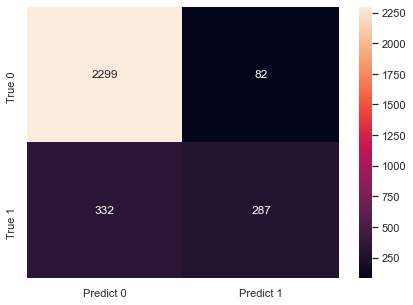

In [108]:
cm_adam2 = confusion_matrix(y_test.values, Y_pred_value_class_adam2)
df_cm_adam2 = pd.DataFrame(cm_adam2, index = [i for i in ["True 0", "True 1"]],
                     columns = [i for i in ["Predict 0", "Predict 1"]] )
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_adam2, annot=True, fmt = 'd');

In [109]:
row_index = row_index + 1

results_df_data = [ 3,'Adam',3,64,'elu',32,'LeakyReLU',1,'sigmoid', 0, 'No layer',0,'No layer',
                   bankdata_model_adam2.history.history['loss'][-1],
                            bankdata_model_adam2.history.history['accuracy'][-1], eva_results_adam2[0],eva_results_adam2[1], 
                            recall_score(y_test.values,Y_pred_value_class_adam2), precision_score(y_test.values, 
                            Y_pred_value_class_adam2), f1_score(y_test.values,Y_pred_value_class_adam2)]
results_df.loc[row_index] = results_df_data
#results_df = results_df.drop[0]

In [110]:
results_df

,Case X,Model details,Num of layers,Layer 1 nodes,Layer1 Act F,Layer 2 nodes,Layer2 Act F,Layer 3 nodes,Layer3 Act F,Layer 4 nodes,Layer4 Act F,Layer 5 nodes,Layer5 Act F,Train data-loss,Train data-Accuracy,Test data-Loss,Test data-Accuracy,Recall score,Precision score,F score
1,1,Adam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.324872,0.865714,0.356527,0.859000,0.474960,0.750000,0.581602
2,2,Nadam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.326212,0.865429,0.351584,0.863333,0.444265,0.806452,0.572917
3,3,Adam,3,64,elu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.325175,0.864714,0.349988,0.862000,0.463651,0.777778,0.580972


### 6.4 Case 4 using Adam optimizer  with relu in first layer and also using LeakyRelu activation function 

##### Creating Model using Keras

In [111]:
bankdata_model_adam3 = Sequential()

### Adding layers to the model. Here we add LeakyReLU as a layer since advanced activation is to be added as layer and not called as a function

In [112]:
bankdata_model_adam3.add(Dense(64, input_shape = (26,), activation = 'relu'))
bankdata_model_adam3.add(Dense(32, LeakyReLU(alpha=0.1)))
bankdata_model_adam3.add(Dense(1, activation = 'sigmoid'))  # sigmoid since we are classifying the data , to find out 'churn' possibility

In [113]:
gd_optimizer_adam3 = optimizers.Adam(lr = 0.001) ## use beta_1 , beta_2 , epsilon as deafults

In [114]:
bankdata_model_adam3.compile(optimizer = gd_optimizer_adam3, loss = 'binary_crossentropy', metrics=['accuracy'])

#### Model summary

In [115]:
bankdata_model_adam3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                1728      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________________


### Training model with forward pass and backpropogation 

In [116]:
bankdata_model_adam3.fit(X_train, y_train, batch_size = 500, epochs = 40, verbose = 1)

Train on 7000 samples
Epoch 1/40
7000/7000 [==============================] - 0s 45us/sample - loss: 0.6022 - accuracy: 0.7327
Epoch 2/40
7000/7000 [==============================] - 0s 6us/sample - loss: 0.4978 - accuracy: 0.7974
Epoch 3/40
7000/7000 [==============================] - 0s 5us/sample - loss: 0.4639 - accuracy: 0.7974
Epoch 4/40
7000/7000 [==============================] - 0s 7us/sample - loss: 0.4384 - accuracy: 0.7981
Epoch 5/40
7000/7000 [==============================] - 0s 5us/sample - loss: 0.4186 - accuracy: 0.8043
Epoch 6/40
7000/7000 [==============================] - 0s 7us/sample - loss: 0.4025 - accuracy: 0.8134
Epoch 7/40
7000/7000 [==============================] - 0s 5us/sample - loss: 0.3895 - accuracy: 0.8216
Epoch 8/40
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3785 - accuracy: 0.8341
Epoch 9/40
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3700 - accuracy: 0.8390
Epoch 10/40
7000/7000 [==================

### Model Evaluation 

In [117]:
eva_results_adam3 = bankdata_model_adam3.evaluate(X_test, y_test.values)

3000/3000 [==============================] - 0s 73us/sample - loss: 0.3608 - accuracy: 0.8567


In [118]:
print(bankdata_model_adam3.metrics_names)
print(eva_results_adam3)

['loss', 'accuracy']
[0.36082669949531554, 0.8566667]


### 7.4 Prediting using classes and probability , with threshold of 0.5

#### Option 1- using predict_classes ( without using threshold )

In [119]:
Y_pred_class_adam3 = bankdata_model_adam3.predict_classes(X_test, batch_size=200, verbose=1)
print(Y_pred_class_adam3)

3000/3000 [==============================] - 0s 18us/sample
[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


#### Option 2 - using predict to get predicted values of 'Exited' , based on which threshold of 0.5 can be applied

In [120]:
Y_pred_value_adam3 = bankdata_model_adam3.predict(X_test, batch_size=200, verbose=1)
print(Y_pred_value_adam3)

3000/3000 [==============================] - 0s 11us/sample
[[0.21968356]
 [0.00943146]
 [0.7020907 ]
 ...
 [0.19268517]
 [0.08496214]
 [0.22616063]]


In [121]:
Y_pred_value_class_adam3 = (Y_pred_value_adam3 > 0.5).astype(int)
print(Y_pred_value_class_adam3)

# Print predicted 1 and 0's 
unique, counts = np.unique(Y_pred_value_class_adam3, return_counts = True)
print('\nThe number of predicted 1 (Exited) and 0 ( Not Exited) are :\n', dict(zip(unique, counts)))


[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]

The number of predicted 1 (Exited) and 0 ( Not Exited) are :
 {0: 2611, 1: 389}


## 8.4 Printing Accuracy scores and confusion matrix

### Confusion metrics - when using predict_classes method 

In [122]:
# Y_pred_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Adam optimizer :'+ str(bankdata_model_adam3.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_class_adam3)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_class_adam3)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_class_adam3)))
confusion_matrix(y_test.values, Y_pred_class_adam3)

3000/3000 [==============================] - 0s 37us/sample - loss: 0.3608 - accuracy: 0.8567
Accuracy of Model with Adam optimizer :0.8566667
Recall_score: 0.4668820678513732
Precision_score: 0.7429305912596401
F-score: 0.5734126984126985


array([[2281,  100],
       [ 330,  289]], dtype=int64)

### Confusion metrics - when using predict method that gives values , and where threshold of 0.5 has been applied

In [123]:
# Y_pred_value_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model  with Adam optimizer :'+ str(bankdata_model_adam3.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_value_class_adam3)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_value_class_adam3)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_value_class_adam3)))
confusion_matrix(y_test.values, Y_pred_value_class_adam3)

3000/3000 [==============================] - 0s 33us/sample - loss: 0.3608 - accuracy: 0.8567
Accuracy of Model  with Adam optimizer :0.8566667
Recall_score: 0.4668820678513732
Precision_score: 0.7429305912596401
F-score: 0.5734126984126985


array([[2281,  100],
       [ 330,  289]], dtype=int64)

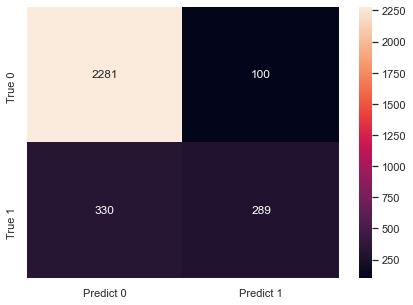

In [124]:
cm_adam3 = confusion_matrix(y_test.values, Y_pred_value_class_adam3)
df_cm_adam3 = pd.DataFrame(cm_adam3, index = [i for i in ["True 0", "True 1"]],
                     columns = [i for i in ["Predict 0", "Predict 1"]] )
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_adam3, annot=True, fmt = 'd');

In [125]:
row_index = row_index + 1

results_df_data = [ 4,'Adam',3,64,'relu',32,'LeakyReLU',1,'sigmoid', 0, 'No layer',0, 'No layer',
                   bankdata_model_adam3.history.history['loss'][-1], bankdata_model_adam3.history.history['accuracy'][-1], 
                   eva_results_adam3[0],eva_results_adam3[1],recall_score(y_test.values,Y_pred_value_class_adam3), 
                   precision_score(y_test.values, Y_pred_value_class_adam3), 
                   f1_score(y_test.values,Y_pred_value_class_adam3)]
results_df.loc[row_index] = results_df_data
#results_df = results_df.drop[0]

In [126]:
results_df

,Case X,Model details,Num of layers,Layer 1 nodes,Layer1 Act F,Layer 2 nodes,Layer2 Act F,Layer 3 nodes,Layer3 Act F,Layer 4 nodes,Layer4 Act F,Layer 5 nodes,Layer5 Act F,Train data-loss,Train data-Accuracy,Test data-Loss,Test data-Accuracy,Recall score,Precision score,F score
1,1,Adam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.324872,0.865714,0.356527,0.859000,0.474960,0.750000,0.581602
2,2,Nadam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.326212,0.865429,0.351584,0.863333,0.444265,0.806452,0.572917
3,3,Adam,3,64,elu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.325175,0.864714,0.349988,0.862000,0.463651,0.777778,0.580972
4,4,Adam,3,64,relu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.308470,0.871000,0.360827,0.856667,0.466882,0.742931,0.573413


### 6.5  Case 5 using Adam optimizer  with LeakyRelu activation function , with 4 layers

##### Creating Model using Keras

In [127]:
bankdata_model_adam4 = Sequential()

### Adding layers to the model , with total 5 layers. Here we add LeakyReLU as a layer since advanced activation is to be added as layer and not called as a function

In [128]:
bankdata_model_adam4.add(Dense(128, input_shape = (26,), activation = 'relu'))
bankdata_model_adam4.add(Dense(64, LeakyReLU(alpha=0.3)))  # changed alpha to 0.3 from 0.1
bankdata_model_adam4.add(Dense(32, LeakyReLU(alpha=0.3)))  # changed alpha to 0.3 from 0.1
bankdata_model_adam4.add(Dense(16, LeakyReLU(alpha=0.3)))  # changed alpha to 0.3 from 0.1
bankdata_model_adam4.add(Dense(1, activation = 'sigmoid'))  # sigmoid since we are classifying the data , to find out 'churn' possibility

In [129]:
gd_optimizer_adam4 = optimizers.Adam(lr = 0.001) ## use beta_1 , beta_2 , epsilon as deafults

In [130]:
bankdata_model_adam4.compile(optimizer = gd_optimizer_adam4, loss = 'binary_crossentropy', metrics=['accuracy'])

#### Model summary

In [131]:
bankdata_model_adam4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               3456      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 17        
Total params: 14,337
Trainable params: 14,337
Non-trainable params: 0
_________________________________________________________________


### Training model with forward pass and backpropogation 

In [132]:
bankdata_model_adam4.fit(X_train, y_train, batch_size = 500, epochs = 280, verbose = 1)

Train on 7000 samples
Epoch 1/280
7000/7000 [==============================] - 1s 75us/sample - loss: 0.6147 - accuracy: 0.7203
Epoch 2/280
7000/7000 [==============================] - 0s 9us/sample - loss: 0.4723 - accuracy: 0.7974
Epoch 3/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.4260 - accuracy: 0.7983
Epoch 4/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3986 - accuracy: 0.8149
Epoch 5/280
7000/7000 [==============================] - 0s 9us/sample - loss: 0.3805 - accuracy: 0.8306
Epoch 6/280
7000/7000 [==============================] - 0s 8us/sample - loss: 0.3674 - accuracy: 0.8391
Epoch 7/280
7000/7000 [==============================] - 0s 6us/sample - loss: 0.3563 - accuracy: 0.8490
Epoch 8/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3488 - accuracy: 0.8500
Epoch 9/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3432 - accuracy: 0.8551
Epoch 10/280
7000/7000 [========

Epoch 78/280
7000/7000 [==============================] - 0s 9us/sample - loss: 0.1498 - accuracy: 0.9457
Epoch 79/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.1522 - accuracy: 0.9433
Epoch 80/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.1591 - accuracy: 0.9393
Epoch 81/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.1507 - accuracy: 0.9414
Epoch 82/280
7000/7000 [==============================] - 0s 9us/sample - loss: 0.1535 - accuracy: 0.9417
Epoch 83/280
7000/7000 [==============================] - 0s 6us/sample - loss: 0.1467 - accuracy: 0.9439
Epoch 84/280
7000/7000 [==============================] - 0s 6us/sample - loss: 0.1398 - accuracy: 0.9480
Epoch 85/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.1464 - accuracy: 0.9450
Epoch 86/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.1486 - accuracy: 0.9419
Epoch 87/280
7000/7000 [======================

7000/7000 [==============================] - 0s 7us/sample - loss: 0.0373 - accuracy: 0.9870
Epoch 231/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.0289 - accuracy: 0.9901
Epoch 232/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.0186 - accuracy: 0.9953
Epoch 233/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.0247 - accuracy: 0.9914
Epoch 234/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.0312 - accuracy: 0.9877
Epoch 235/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.0376 - accuracy: 0.9854
Epoch 236/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.0367 - accuracy: 0.9849
Epoch 237/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.0346 - accuracy: 0.9871
Epoch 238/280
7000/7000 [==============================] - 0s 8us/sample - loss: 0.0366 - accuracy: 0.9860
Epoch 239/280
7000/7000 [==========================

### Shows model overfitted to Train data , with accuracy reaching 0.9997 

### Model Evaluation 

In [133]:
eva_results_adam4 = bankdata_model_adam4.evaluate(X_test, y_test.values)

3000/3000 [==============================] - 0s 94us/sample - loss: 1.8825 - accuracy: 0.7967


In [134]:
print(bankdata_model_adam4.metrics_names)
print(eva_results_adam4)

['loss', 'accuracy']
[1.8824576695760091, 0.7966667]


#### It can be seen that with Test data , accuracy drops , since model was overfitted to Train data

### 7.5 Prediting using classes and probability , with threshold of 0.5

#### Option 1- using predict_classes ( without using threshold )

In [135]:
Y_pred_class_adam4 = bankdata_model_adam4.predict_classes(X_test, batch_size=200, verbose=1)
print(Y_pred_class_adam4)

3000/3000 [==============================] - 0s 23us/sample
[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


#### Option 2 - using predict to get predicted values of 'Exited' , based on which threshold of 0.5 can be applied

In [136]:
Y_pred_value_adam4 = bankdata_model_adam4.predict(X_test, batch_size=200, verbose=1)
print(Y_pred_value_adam4)

3000/3000 [==============================] - 0s 11us/sample
[[1.9396774e-02]
 [3.0608335e-06]
 [4.6065473e-03]
 ...
 [9.9998999e-01]
 [5.2769786e-07]
 [1.6500064e-05]]


In [137]:
Y_pred_value_class_adam4 = (Y_pred_value_adam4 > 0.5).astype(int)
print(Y_pred_value_class_adam4)

# Print predicted 1 and 0's 
unique, counts = np.unique(Y_pred_value_class_adam4, return_counts = True)
print('\nThe number of predicted 1 (Exited) and 0 ( Not Exited) are :\n', dict(zip(unique, counts)))


[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]

The number of predicted 1 (Exited) and 0 ( Not Exited) are :
 {0: 2409, 1: 591}


## 8.5 Printing Accuracy scores and confusion matrix

### Confusion metrics - when using predict_classes method 

In [138]:
# Y_pred_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Adam optimizer :'+ str(bankdata_model_adam4.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_class_adam4)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_class_adam4)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_class_adam4)))
confusion_matrix(y_test.values, Y_pred_class_adam4)

3000/3000 [==============================] - 0s 42us/sample - loss: 1.8825 - accuracy: 0.7967
Accuracy of Model with Adam optimizer :0.7966667
Recall_score: 0.48465266558966075
Precision_score: 0.5076142131979695
F-score: 0.4958677685950413


array([[2090,  291],
       [ 319,  300]], dtype=int64)

### Confusion metrics - when using predict method that gives values , and where threshold of 0.5 has been applied

In [139]:
# Y_pred_value_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Adam optimizer :'+ str(bankdata_model_adam4.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_value_class_adam4)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_value_class_adam4)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_value_class_adam4)))
confusion_matrix(y_test.values, Y_pred_value_class_adam4)

3000/3000 [==============================] - 0s 35us/sample - loss: 1.8825 - accuracy: 0.7967
Accuracy of Model with Adam optimizer :0.7966667
Recall_score: 0.48465266558966075
Precision_score: 0.5076142131979695
F-score: 0.4958677685950413


array([[2090,  291],
       [ 319,  300]], dtype=int64)

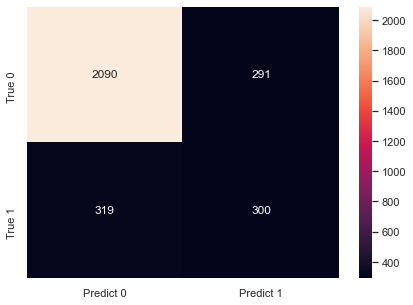

In [140]:
cm_adam4 = confusion_matrix(y_test.values, Y_pred_value_class_adam4)
df_cm_adam4 = pd.DataFrame(cm_adam4, index = [i for i in ["True 0", "True 1"]],
                     columns = [i for i in ["Predict 0", "Predict 1"]] )
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_adam4, annot=True, fmt = 'd');

In [141]:
row_index = row_index + 1

results_df_data = [ 5,'Adam',5,128,'relu',64,'LeakyReLU',32,'LeakyReLU',16,'LeakyReLU',1,'sigmoid', 
                   bankdata_model_adam4.history.history['loss'][-1],
                            bankdata_model_adam4.history.history['accuracy'][-1], eva_results_adam4[0],eva_results_adam4[1], 
                            recall_score(y_test.values,Y_pred_value_class_adam4), precision_score(y_test.values, 
                            Y_pred_value_class_adam4), f1_score(y_test.values,Y_pred_value_class_adam4)]
results_df.loc[row_index] = results_df_data
#results_df = results_df.drop[0]

In [142]:
results_df

,Case X,Model details,Num of layers,Layer 1 nodes,Layer1 Act F,Layer 2 nodes,Layer2 Act F,Layer 3 nodes,Layer3 Act F,Layer 4 nodes,Layer4 Act F,Layer 5 nodes,Layer5 Act F,Train data-loss,Train data-Accuracy,Test data-Loss,Test data-Accuracy,Recall score,Precision score,F score
1,1,Adam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.324872,0.865714,0.356527,0.859000,0.474960,0.750000,0.581602
2,2,Nadam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.326212,0.865429,0.351584,0.863333,0.444265,0.806452,0.572917
3,3,Adam,3,64,elu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.325175,0.864714,0.349988,0.862000,0.463651,0.777778,0.580972
4,4,Adam,3,64,relu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.308470,0.871000,0.360827,0.856667,0.466882,0.742931,0.573413
5,5,Adam,5,128,relu,64,LeakyReLU,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0.005982,0.999429,1.882458,0.796667,0.484653,0.507614,0.495868


### 6.6 Case 6 using NAdam optimizer  with LeakyRelu activation function , with 4 layers

##### Creating Model using Keras

In [143]:
bankdata_model_nadam2 = Sequential()

### Adding layers to the model , with total 5 layers. Here we add LeakyReLU as a layer since advanced activation is to be added as layer and not called as a function

In [144]:
bankdata_model_nadam2.add(Dense(128, input_shape = (26,), activation = 'relu'))
bankdata_model_nadam2.add(Dense(64, LeakyReLU(alpha=0.3)))  # changed alpha to 0.3 from 0.1
bankdata_model_nadam2.add(Dense(32, LeakyReLU(alpha=0.3)))  # changed alpha to 0.3 from 0.1
bankdata_model_nadam2.add(Dense(16, LeakyReLU(alpha=0.3)))  # changed alpha to 0.3 from 0.1
bankdata_model_nadam2.add(Dense(1, activation = 'sigmoid'))  # sigmoid since we are classifying the data , to find out 'churn' possibility

In [145]:
gd_optimizer_nadam2 = optimizers.Nadam(lr = 0.001, beta_1 = 0.8) ## use beta_1=0.8 (default=0.9) , beta_2 , epsilon as deafults

In [146]:
bankdata_model_nadam2.compile(optimizer = gd_optimizer_nadam2, loss = 'binary_crossentropy', metrics=['accuracy'])

#### Model summary

In [147]:
bankdata_model_nadam2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 128)               3456      
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 17        
Total params: 14,337
Trainable params: 14,337
Non-trainable params: 0
_________________________________________________________________


### Training model with forward pass and backpropogation 

In [148]:
bankdata_model_nadam2.fit(X_train, y_train, batch_size = 500, epochs = 280, verbose = 1)

Train on 7000 samples
Epoch 1/280
7000/7000 [==============================] - 1s 120us/sample - loss: 0.5559 - accuracy: 0.7311
Epoch 2/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.4174 - accuracy: 0.8094
Epoch 3/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3854 - accuracy: 0.8287
Epoch 4/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3688 - accuracy: 0.8421
Epoch 5/280
7000/7000 [==============================] - 0s 12us/sample - loss: 0.3591 - accuracy: 0.8453
Epoch 6/280
7000/7000 [==============================] - 0s 9us/sample - loss: 0.3504 - accuracy: 0.8523
Epoch 7/280
7000/7000 [==============================] - 0s 10us/sample - loss: 0.3421 - accuracy: 0.8587
Epoch 8/280
7000/7000 [==============================] - 0s 8us/sample - loss: 0.3373 - accuracy: 0.8589
Epoch 9/280
7000/7000 [==============================] - 0s 9us/sample - loss: 0.3370 - accuracy: 0.8593
Epoch 10/280
7000/7000 [=====

7000/7000 [==============================] - 0s 7us/sample - loss: 0.1487 - accuracy: 0.9447
Epoch 154/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.0998 - accuracy: 0.9673
Epoch 155/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.1566 - accuracy: 0.9376
Epoch 156/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.1104 - accuracy: 0.9580
Epoch 157/280
7000/7000 [==============================] - 0s 6us/sample - loss: 0.1586 - accuracy: 0.9350
Epoch 158/280
7000/7000 [==============================] - 0s 8us/sample - loss: 0.1191 - accuracy: 0.9516
Epoch 159/280
7000/7000 [==============================] - 0s 8us/sample - loss: 0.0962 - accuracy: 0.9687
Epoch 160/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.0937 - accuracy: 0.9686
Epoch 161/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.0979 - accuracy: 0.9661
Epoch 162/280
7000/7000 [==========================

### Shows model overfitted to Train data , with accuracy reaching 0.9997 

### Model Evaluation 

In [149]:
eva_results_nadam2 = bankdata_model_nadam2.evaluate(X_test, y_test.values)

3000/3000 [==============================] - 0s 111us/sample - loss: 1.0671 - accuracy: 0.8093


In [150]:
print(bankdata_model_nadam2.metrics_names)
print(eva_results_nadam2)

['loss', 'accuracy']
[1.06713347474734, 0.8093333]


#### It can be seen that with Test data , accuracy drops , since model was overfitted to Train data

### 7.6  Prediting using classes and probability , with threshold of 0.5

#### Option 1- using predict_classes ( without using threshold )

In [151]:
Y_pred_class_nadam2 = bankdata_model_nadam2.predict_classes(X_test, batch_size=200, verbose=1)
print(Y_pred_class_nadam2)

3000/3000 [==============================] - 0s 28us/sample
[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [1]]


#### Option 2 - using predict to get predicted values of 'Exited' , based on which threshold of 0.5 can be applied

In [152]:
Y_pred_value_nadam2 = bankdata_model_nadam2.predict(X_test, batch_size=200, verbose=1)
print(Y_pred_value_nadam2)

3000/3000 [==============================] - 0s 17us/sample
[[6.2594446e-04]
 [7.6288379e-06]
 [8.1054264e-01]
 ...
 [1.6191301e-03]
 [5.6769371e-05]
 [6.2419587e-01]]


In [153]:
Y_pred_value_class_nadam2 = (Y_pred_value_nadam2 > 0.5).astype(int)
print(Y_pred_value_class_nadam2)

# Print predicted 1 and 0's 
unique, counts = np.unique(Y_pred_value_class_nadam2, return_counts = True)
print('\nThe number of predicted 1 (Exited) and 0 ( Not Exited) are :\n', dict(zip(unique, counts)))


[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [1]]

The number of predicted 1 (Exited) and 0 ( Not Exited) are :
 {0: 2437, 1: 563}


## 8.6 Printing Accuracy scores and confusion matrix

### Confusion metrics - when using predict_classes method 

In [154]:
# Y_pred_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Nadam optimizer :'+ str(bankdata_model_nadam2.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_class_nadam2)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_class_nadam2)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_class_nadam2)))
confusion_matrix(y_test.values, Y_pred_class_nadam2)

3000/3000 [==============================] - 0s 39us/sample - loss: 1.0671 - accuracy: 0.8093
Accuracy of Model with Nadam optimizer :0.8093333
Recall_score: 0.4927302100161551
Precision_score: 0.5417406749555951
F-score: 0.5160744500846024


array([[2123,  258],
       [ 314,  305]], dtype=int64)

### Confusion metrics - when using predict method that gives values , and where threshold of 0.5 has been applied

In [155]:
# Y_pred_value_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Nadam optimizer :'+ str(bankdata_model_nadam2.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_value_class_nadam2)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_value_class_nadam2)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_value_class_nadam2)))
confusion_matrix(y_test.values, Y_pred_value_class_nadam2)

3000/3000 [==============================] - 0s 34us/sample - loss: 1.0671 - accuracy: 0.8093
Accuracy of Model with Nadam optimizer :0.8093333
Recall_score: 0.4927302100161551
Precision_score: 0.5417406749555951
F-score: 0.5160744500846024


array([[2123,  258],
       [ 314,  305]], dtype=int64)

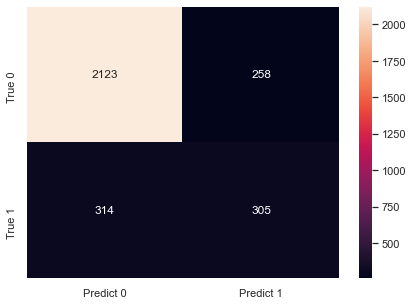

In [156]:
cm_nadam2 = confusion_matrix(y_test.values, Y_pred_value_class_nadam2)
df_cm_nadam2 = pd.DataFrame(cm_nadam2, index = [i for i in ["True 0", "True 1"]],
                     columns = [i for i in ["Predict 0", "Predict 1"]] )
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_nadam2, annot=True, fmt = 'd');

In [157]:
row_index = row_index + 1

results_df_data = [ 6,'Nadam',5,128,'relu',64,'LeakyReLU',32,'LeakyReLU',16,'LeakyReLU',1,'sigmoid', 
                   bankdata_model_nadam2.history.history['loss'][-1],
                            bankdata_model_nadam2.history.history['accuracy'][-1], eva_results_nadam2[0],eva_results_nadam2[1], 
                            recall_score(y_test.values,Y_pred_value_class_nadam2), precision_score(y_test.values, 
                            Y_pred_value_class_nadam2), f1_score(y_test.values,Y_pred_value_class_nadam2)]
results_df.loc[row_index] = results_df_data
#results_df = results_df.drop[0]

In [158]:
results_df

,Case X,Model details,Num of layers,Layer 1 nodes,Layer1 Act F,Layer 2 nodes,Layer2 Act F,Layer 3 nodes,Layer3 Act F,Layer 4 nodes,Layer4 Act F,Layer 5 nodes,Layer5 Act F,Train data-loss,Train data-Accuracy,Test data-Loss,Test data-Accuracy,Recall score,Precision score,F score
1,1,Adam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.324872,0.865714,0.356527,0.859000,0.474960,0.750000,0.581602
2,2,Nadam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.326212,0.865429,0.351584,0.863333,0.444265,0.806452,0.572917
3,3,Adam,3,64,elu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.325175,0.864714,0.349988,0.862000,0.463651,0.777778,0.580972
4,4,Adam,3,64,relu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.308470,0.871000,0.360827,0.856667,0.466882,0.742931,0.573413
5,5,Adam,5,128,relu,64,LeakyReLU,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0.005982,0.999429,1.882458,0.796667,0.484653,0.507614,0.495868
6,6,Nadam,5,128,relu,64,LeakyReLU,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0.021518,0.997857,1.067133,0.809333,0.492730,0.541741,0.516074


### 6.7 Case 7 using NAdam optimizer  with LeakyRelu activation function , with 4 layers

##### Creating Model using Keras

In [159]:
bankdata_model_nadam3 = Sequential()

### Adding layers to the model , with total 4 layers. Here we add LeakyReLU as a layer since advanced activation is to be added as layer and not called as a function

In [160]:
bankdata_model_nadam3.add(Dense(64, input_shape = (26,), activation = 'relu'))
bankdata_model_nadam3.add(Dense(32, LeakyReLU(alpha=0.3)))  # changed alpha to 0.3 from 0.1
bankdata_model_nadam3.add(Dense(16, LeakyReLU(alpha=0.3)))  # changed alpha to 0.3 from 0.1
bankdata_model_nadam3.add(Dense(1, activation = 'sigmoid'))  # sigmoid since we are classifying the data , to find out 'churn' possibility

In [161]:
gd_optimizer_nadam3 = optimizers.Nadam(lr = 0.001, beta_1 = 0.8) ## use beta_1=0.8 (default=0.9) , beta_2 , epsilon as deafults

In [162]:
bankdata_model_nadam3.compile(optimizer = gd_optimizer_nadam3, loss = 'binary_crossentropy', metrics=['accuracy'])

#### Model summary

In [163]:
bankdata_model_nadam3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 64)                1728      
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 17        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


### Training model with forward pass and backpropogation 

In [164]:
bankdata_model_nadam3.fit(X_train, y_train, batch_size = 500, epochs = 280, verbose = 1)

Train on 7000 samples
Epoch 1/280
7000/7000 [==============================] - 1s 93us/sample - loss: 0.5380 - accuracy: 0.7866
Epoch 2/280
7000/7000 [==============================] - 0s 8us/sample - loss: 0.4478 - accuracy: 0.7981
Epoch 3/280
7000/7000 [==============================] - 0s 4us/sample - loss: 0.4125 - accuracy: 0.8091
Epoch 4/280
7000/7000 [==============================] - 0s 5us/sample - loss: 0.3932 - accuracy: 0.8226
Epoch 5/280
7000/7000 [==============================] - 0s 5us/sample - loss: 0.3798 - accuracy: 0.8286
Epoch 6/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3698 - accuracy: 0.8399
Epoch 7/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3619 - accuracy: 0.8453
Epoch 8/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3556 - accuracy: 0.8503
Epoch 9/280
7000/7000 [==============================] - 0s 5us/sample - loss: 0.3506 - accuracy: 0.8516
Epoch 10/280
7000/7000 [========

7000/7000 [==============================] - 0s 4us/sample - loss: 0.2137 - accuracy: 0.9157
Epoch 155/280
7000/7000 [==============================] - 0s 5us/sample - loss: 0.2131 - accuracy: 0.9164
Epoch 156/280
7000/7000 [==============================] - 0s 4us/sample - loss: 0.2215 - accuracy: 0.9119
Epoch 157/280
7000/7000 [==============================] - 0s 4us/sample - loss: 0.2129 - accuracy: 0.9157
Epoch 158/280
7000/7000 [==============================] - 0s 5us/sample - loss: 0.2213 - accuracy: 0.9119
Epoch 159/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.2132 - accuracy: 0.9149
Epoch 160/280
7000/7000 [==============================] - 0s 3us/sample - loss: 0.2204 - accuracy: 0.9103
Epoch 161/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.2078 - accuracy: 0.9189
Epoch 162/280
7000/7000 [==============================] - 0s 6us/sample - loss: 0.2074 - accuracy: 0.9184
Epoch 163/280
7000/7000 [==========================

### Model Evaluation 

In [165]:
eva_results_nadam3 = bankdata_model_nadam3.evaluate(X_test, y_test.values)

3000/3000 [==============================] - 0s 97us/sample - loss: 0.5976 - accuracy: 0.7977


In [166]:
print(bankdata_model_nadam3.metrics_names)
print(eva_results_nadam3)

['loss', 'accuracy']
[0.5976356331507365, 0.79766667]


### 7.7  Prediting using classes and probability , with threshold of 0.5

#### Option 1- using predict_classes ( without using threshold )

In [167]:
Y_pred_class_nadam3 = bankdata_model_nadam3.predict_classes(X_test, batch_size=200, verbose=1)
print(Y_pred_class_nadam3)

3000/3000 [==============================] - 0s 18us/sample
[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [1]]


#### Option 2 - using predict to get predicted values of 'Exited' , based on which threshold of 0.5 can be applied

In [168]:
Y_pred_value_nadam3 = bankdata_model_nadam3.predict(X_test, batch_size=200, verbose=1)
print(Y_pred_value_nadam3)

3000/3000 [==============================] - 0s 11us/sample
[[1.4803293e-01]
 [8.5298467e-04]
 [7.6656920e-01]
 ...
 [7.5238220e-02]
 [2.4021238e-04]
 [6.9066066e-01]]


In [169]:
Y_pred_value_class_nadam3 = (Y_pred_value_nadam3 > 0.5).astype(int)
print(Y_pred_value_class_nadam3)

# Print predicted 1 and 0's 
unique, counts = np.unique(Y_pred_value_class_nadam3, return_counts = True)
print('\nThe number of predicted 1 (Exited) and 0 ( Not Exited) are :\n', dict(zip(unique, counts)))


[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [1]]

The number of predicted 1 (Exited) and 0 ( Not Exited) are :
 {0: 2292, 1: 708}


## 8.7 Printing Accuracy scores and confusion matrix

### Confusion metrics - when using predict_classes method 

In [170]:
# Y_pred_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Nadam optimizer :'+ str(bankdata_model_nadam3.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_class_nadam3)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_class_nadam3)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_class_nadam3)))
confusion_matrix(y_test.values, Y_pred_class_nadam3)

3000/3000 [==============================] - 0s 35us/sample - loss: 0.5976 - accuracy: 0.7977
Accuracy of Model with Nadam optimizer :0.79766667
Recall_score: 0.5815831987075929
Precision_score: 0.5084745762711864
F-score: 0.5425772418990203


array([[2033,  348],
       [ 259,  360]], dtype=int64)

### Confusion metrics - when using predict method that gives values , and where threshold of 0.5 has been applied

In [171]:
# Y_pred_value_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Nadam optimizer :'+ str(bankdata_model_nadam3.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_value_class_nadam3)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_value_class_nadam3)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_value_class_nadam3)))
confusion_matrix(y_test.values, Y_pred_value_class_nadam3)

3000/3000 [==============================] - 0s 38us/sample - loss: 0.5976 - accuracy: 0.7977
Accuracy of Model with Nadam optimizer :0.79766667
Recall_score: 0.5815831987075929
Precision_score: 0.5084745762711864
F-score: 0.5425772418990203


array([[2033,  348],
       [ 259,  360]], dtype=int64)

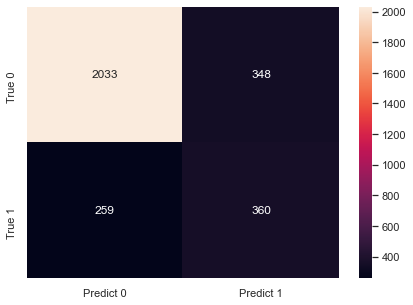

In [172]:
cm_nadam3 = confusion_matrix(y_test.values, Y_pred_value_class_nadam3)
df_cm_nadam3 = pd.DataFrame(cm_nadam3, index = [i for i in ["True 0", "True 1"]],
                     columns = [i for i in ["Predict 0", "Predict 1"]] )
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_nadam3, annot=True, fmt = 'd');

In [173]:
row_index = row_index + 1

results_df_data = [ 7,'Nadam',4,64,'relu',32,'LeakyReLU',16,'LeakyReLU',1,'sigmoid',0,'No layer', 
                   bankdata_model_nadam3.history.history['loss'][-1],
                            bankdata_model_nadam3.history.history['accuracy'][-1], eva_results_nadam3[0],eva_results_nadam3[1], 
                            recall_score(y_test.values,Y_pred_value_class_nadam3), precision_score(y_test.values, 
                            Y_pred_value_class_nadam3), f1_score(y_test.values,Y_pred_value_class_nadam3)]
results_df.loc[row_index] = results_df_data
#results_df = results_df.drop[0]

In [174]:
results_df

,Case X,Model details,Num of layers,Layer 1 nodes,Layer1 Act F,Layer 2 nodes,Layer2 Act F,Layer 3 nodes,Layer3 Act F,Layer 4 nodes,Layer4 Act F,Layer 5 nodes,Layer5 Act F,Train data-loss,Train data-Accuracy,Test data-Loss,Test data-Accuracy,Recall score,Precision score,F score
1,1,Adam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.324872,0.865714,0.356527,0.859000,0.474960,0.750000,0.581602
2,2,Nadam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.326212,0.865429,0.351584,0.863333,0.444265,0.806452,0.572917
3,3,Adam,3,64,elu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.325175,0.864714,0.349988,0.862000,0.463651,0.777778,0.580972
4,4,Adam,3,64,relu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.308470,0.871000,0.360827,0.856667,0.466882,0.742931,0.573413
5,5,Adam,5,128,relu,64,LeakyReLU,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0.005982,0.999429,1.882458,0.796667,0.484653,0.507614,0.495868
6,6,Nadam,5,128,relu,64,LeakyReLU,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0.021518,0.997857,1.067133,0.809333,0.492730,0.541741,0.516074
7,7,Nadam,4,64,relu,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0,No layer,0.181892,0.924714,0.597636,0.797667,0.581583,0.508475,0.542577


In [175]:
results_df1 = results_df.sort_values(by = ['Test data-Accuracy', 'F score'], ascending = False)
results_df1

,Case X,Model details,Num of layers,Layer 1 nodes,Layer1 Act F,Layer 2 nodes,Layer2 Act F,Layer 3 nodes,Layer3 Act F,Layer 4 nodes,Layer4 Act F,Layer 5 nodes,Layer5 Act F,Train data-loss,Train data-Accuracy,Test data-Loss,Test data-Accuracy,Recall score,Precision score,F score
2,2,Nadam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.326212,0.865429,0.351584,0.863333,0.444265,0.806452,0.572917
3,3,Adam,3,64,elu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.325175,0.864714,0.349988,0.862000,0.463651,0.777778,0.580972
1,1,Adam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.324872,0.865714,0.356527,0.859000,0.474960,0.750000,0.581602
4,4,Adam,3,64,relu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.308470,0.871000,0.360827,0.856667,0.466882,0.742931,0.573413
6,6,Nadam,5,128,relu,64,LeakyReLU,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0.021518,0.997857,1.067133,0.809333,0.492730,0.541741,0.516074
7,7,Nadam,4,64,relu,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0,No layer,0.181892,0.924714,0.597636,0.797667,0.581583,0.508475,0.542577
5,5,Adam,5,128,relu,64,LeakyReLU,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0.005982,0.999429,1.882458,0.796667,0.484653,0.507614,0.495868


### 6.8  Case 8 using Nadam optimizer

##### Creating Model using Keras

In [176]:
bankdata_model_nadam4 = Sequential()

### Adding layers to the model.

In [177]:
bankdata_model_nadam4.add(Dense(64, input_shape = (26,), activation = 'elu'))
bankdata_model_nadam4.add(Dense(32, activation = 'selu'))
bankdata_model_nadam4.add(Dense(1, activation = 'sigmoid'))  # sigmoid since we are classifying the data , to find out 'churn' possibility

In [178]:
gd_optimizer_nadam4 = optimizers.Nadam(lr = 0.001) ## use beta_1 , beta_2 , epsilon as deafults

In [179]:
bankdata_model_nadam4.compile(optimizer = gd_optimizer_nadam4, loss = 'binary_crossentropy', metrics=['accuracy'])

#### Model summary

In [180]:
bankdata_model_nadam4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 64)                1728      
_________________________________________________________________
dense_27 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 33        
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________________


### Training model with forward pass and backpropogation 

In [181]:
bankdata_model_nadam4.fit(X_train, y_train, batch_size = 500, epochs = 40, verbose = 1)

Train on 7000 samples
Epoch 1/40
7000/7000 [==============================] - 1s 81us/sample - loss: 0.6267 - accuracy: 0.6504
Epoch 2/40
7000/7000 [==============================] - 0s 5us/sample - loss: 0.4451 - accuracy: 0.8074
Epoch 3/40
7000/7000 [==============================] - 0s 7us/sample - loss: 0.4054 - accuracy: 0.8147
Epoch 4/40
7000/7000 [==============================] - 0s 6us/sample - loss: 0.3903 - accuracy: 0.8217
Epoch 5/40
7000/7000 [==============================] - 0s 6us/sample - loss: 0.3811 - accuracy: 0.8277
Epoch 6/40
7000/7000 [==============================] - 0s 5us/sample - loss: 0.3751 - accuracy: 0.8330
Epoch 7/40
7000/7000 [==============================] - 0s 5us/sample - loss: 0.3713 - accuracy: 0.8367
Epoch 8/40
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3684 - accuracy: 0.8397
Epoch 9/40
7000/7000 [==============================] - 0s 8us/sample - loss: 0.3655 - accuracy: 0.8426
Epoch 10/40
7000/7000 [==================

### Model Evaluation 

In [182]:
eva_results_nadam4 = bankdata_model_nadam4.evaluate(X_test, y_test.values)

3000/3000 [==============================] - 0s 67us/sample - loss: 0.3577 - accuracy: 0.8600


In [183]:
print(bankdata_model_nadam4.metrics_names)
print(eva_results_nadam4)

['loss', 'accuracy']
[0.3577149305343628, 0.86]


### 7.8 Prediting using classes and probability , with threshold of 0.5

#### Option 1- using predict_classes ( without using threshold )

In [184]:
Y_pred_class_nadam4 = bankdata_model_nadam4.predict_classes(X_test, batch_size=200, verbose=1)
print(Y_pred_class_nadam4)

3000/3000 [==============================] - 0s 16us/sample
[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


#### Option 2 - using predict to get predicted values of 'Exited' , based on which threshold of 0.5 can be applied

In [185]:
Y_pred_value_nadam4 = bankdata_model_nadam4.predict(X_test, batch_size=200, verbose=1)
print(Y_pred_value_nadam4)

3000/3000 [==============================] - 0s 5us/sample
[[0.23126592]
 [0.0131988 ]
 [0.81086487]
 ...
 [0.13101937]
 [0.03619527]
 [0.14271986]]


In [186]:
Y_pred_value_class_nadam4 = (Y_pred_value_nadam4 > 0.5).astype(int)
print(Y_pred_value_class_nadam4)

[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


## 8.8 Printing Accuracy scores and confusion matrix

### Confusion metrics - when using predict_classes method 

In [187]:
# Y_pred_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Nadam optimizer :'+ str(bankdata_model_nadam4.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_class_nadam4)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_class_nadam4)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_class_nadam4)))
confusion_matrix(y_test.values, Y_pred_class_nadam4)

3000/3000 [==============================] - 0s 34us/sample - loss: 0.3577 - accuracy: 0.8600
Accuracy of Model with Nadam optimizer :0.86
Recall_score: 0.47495961227786754
Precision_score: 0.7557840616966581
F-score: 0.5833333333333334


array([[2286,   95],
       [ 325,  294]], dtype=int64)

### Confusion metrics - when using predict method that gives values , and where threshold of 0.5 has been applied

In [188]:
# Y_pred_value_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Nadam optimizer :'+ str(bankdata_model_nadam4.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_value_class_nadam4)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_value_class_nadam4)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_value_class_nadam4)))
confusion_matrix(y_test.values, Y_pred_value_class_nadam4)

3000/3000 [==============================] - 0s 32us/sample - loss: 0.3577 - accuracy: 0.8600
Accuracy of Model with Nadam optimizer :0.86
Recall_score: 0.47495961227786754
Precision_score: 0.7557840616966581
F-score: 0.5833333333333334


array([[2286,   95],
       [ 325,  294]], dtype=int64)

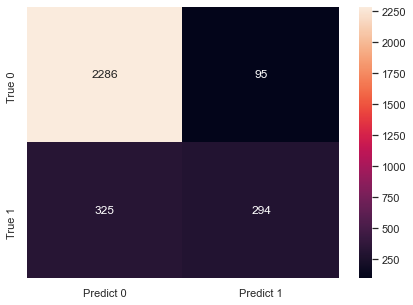

In [189]:
cm_nadam4 = confusion_matrix(y_test.values, Y_pred_value_class_nadam4)
df_cm_nadam4 = pd.DataFrame(cm_nadam4, index = [i for i in ["True 0", "True 1"]],
                     columns = [i for i in ["Predict 0", "Predict 1"]] )
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_nadam4, annot=True, fmt = 'd');

In [190]:
row_index = row_index + 1

results_df_data = [ 8,'Nadam',3,64,'elu',32,'selu',1,'sigmoid', 0, 'No layer', 0,'No layer',
                   bankdata_model_nadam4.history.history['loss'][-1],
                            bankdata_model_nadam4.history.history['accuracy'][-1], eva_results_nadam4[0],eva_results_nadam4[1], 
                            recall_score(y_test.values,Y_pred_value_class_nadam4), precision_score(y_test.values, 
                            Y_pred_value_class_nadam4), f1_score(y_test.values,Y_pred_value_class_nadam4)]
results_df.loc[row_index] = results_df_data
#results_df = results_df.drop[0]

In [191]:
results_df

,Case X,Model details,Num of layers,Layer 1 nodes,Layer1 Act F,Layer 2 nodes,Layer2 Act F,Layer 3 nodes,Layer3 Act F,Layer 4 nodes,Layer4 Act F,Layer 5 nodes,Layer5 Act F,Train data-loss,Train data-Accuracy,Test data-Loss,Test data-Accuracy,Recall score,Precision score,F score
1,1,Adam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.324872,0.865714,0.356527,0.859000,0.474960,0.750000,0.581602
2,2,Nadam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.326212,0.865429,0.351584,0.863333,0.444265,0.806452,0.572917
3,3,Adam,3,64,elu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.325175,0.864714,0.349988,0.862000,0.463651,0.777778,0.580972
4,4,Adam,3,64,relu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.308470,0.871000,0.360827,0.856667,0.466882,0.742931,0.573413
5,5,Adam,5,128,relu,64,LeakyReLU,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0.005982,0.999429,1.882458,0.796667,0.484653,0.507614,0.495868
6,6,Nadam,5,128,relu,64,LeakyReLU,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0.021518,0.997857,1.067133,0.809333,0.492730,0.541741,0.516074
7,7,Nadam,4,64,relu,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0,No layer,0.181892,0.924714,0.597636,0.797667,0.581583,0.508475,0.542577
8,8,Nadam,3,64,elu,32,selu,1,sigmoid,0,No layer,0,No layer,0.335527,0.861286,0.357715,0.860000,0.474960,0.755784,0.583333


In [192]:
results_df1 = results_df.sort_values(by = ['Test data-Accuracy', 'F score'], ascending = False)
results_df1

,Case X,Model details,Num of layers,Layer 1 nodes,Layer1 Act F,Layer 2 nodes,Layer2 Act F,Layer 3 nodes,Layer3 Act F,Layer 4 nodes,Layer4 Act F,Layer 5 nodes,Layer5 Act F,Train data-loss,Train data-Accuracy,Test data-Loss,Test data-Accuracy,Recall score,Precision score,F score
2,2,Nadam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.326212,0.865429,0.351584,0.863333,0.444265,0.806452,0.572917
3,3,Adam,3,64,elu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.325175,0.864714,0.349988,0.862000,0.463651,0.777778,0.580972
8,8,Nadam,3,64,elu,32,selu,1,sigmoid,0,No layer,0,No layer,0.335527,0.861286,0.357715,0.860000,0.474960,0.755784,0.583333
1,1,Adam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.324872,0.865714,0.356527,0.859000,0.474960,0.750000,0.581602
4,4,Adam,3,64,relu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.308470,0.871000,0.360827,0.856667,0.466882,0.742931,0.573413
6,6,Nadam,5,128,relu,64,LeakyReLU,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0.021518,0.997857,1.067133,0.809333,0.492730,0.541741,0.516074
7,7,Nadam,4,64,relu,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0,No layer,0.181892,0.924714,0.597636,0.797667,0.581583,0.508475,0.542577
5,5,Adam,5,128,relu,64,LeakyReLU,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0.005982,0.999429,1.882458,0.796667,0.484653,0.507614,0.495868


## Observations :
    1> The best accuracy score on test data is given by Model 2 . This model used :
        a) Optimizer = NAdam
        b) 3 layers
        c) Activation functions - elu / relu and sigmoid
    2> Management should use the Model 2 to predict persons who are most likely to exit . By concentrating efforts 
        on this group , management can try to reduce churn rate.
    3> Higher number of layers and nodes do not necessarly result in better accuracy scores. Example Model 5 and 6 
        used 5 layers
    4> Models 5 & 6 were run with large number of epochs and we got Training accuracy scores greater than 0.99. However , 
        Test accuracy scores were lower. This indicates over fitting of model .